In [19]:
from keras.datasets import mnist

In [20]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [21]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [22]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [23]:
# from matplotlib import pyplot
# for i in range(9):  
#     pyplot.subplot(330 + 1 + i)
#     pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
#     pyplot.show()



In [25]:
from sklearn.neural_network import MLPClassifier


nsamples, nx, ny = train_X.shape
train_X = train_X.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_X.shape
test_X = test_X.reshape((nsamples,nx*ny))

clf = MLPClassifier(random_state=1, hidden_layer_sizes = (50,50,20), max_iter=300).fit(train_X, train_y)
clf.predict_proba(test_X[:1])
clf.predict(test_X[:5, :])
clf.score(test_X, test_y)

0.968

In [26]:
train_y[0]

5

In [27]:
clf.predict(test_X[:5, :])


array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
test_y[:5]


array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (50, 50, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

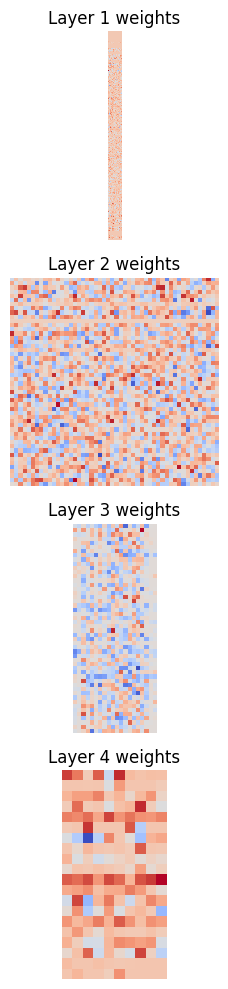

In [30]:
# this is gpt code, and the images that come out don't make heaps of sense. Rework later.

import numpy as np
import matplotlib.pyplot as plt


# Get the weights of the MLP
weights = clf.coefs_

# Visualize the weights
fig, axs = plt.subplots(len(weights), 1, figsize=(10, 10))
for i, w in enumerate(weights):
    print(w)
    axs[i].imshow(w, cmap='coolwarm', interpolation='nearest')
    axs[i].set_title(f'Layer {i+1} weights')
    axs[i].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
clf.n_features_in_

784

In [33]:
len(weights[0])

784